In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

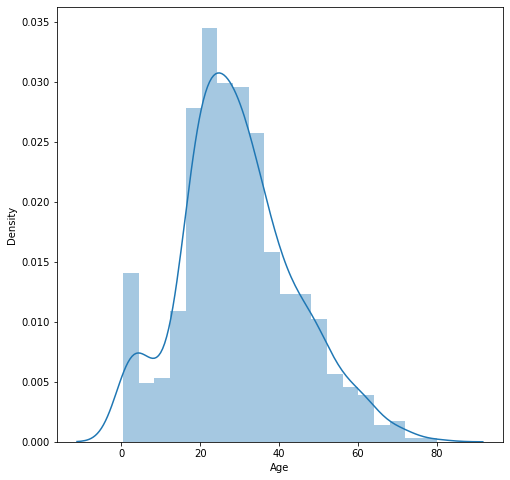

In [4]:
plt.figure(figsize=(8,8))
sns.distplot(a=train_df['Age'], kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

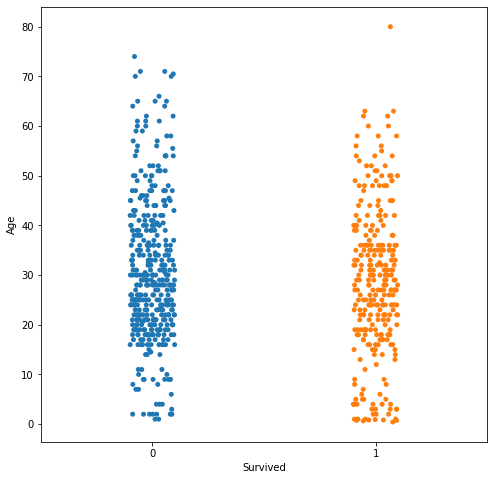

In [5]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Survived", y="Age", data=train_df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

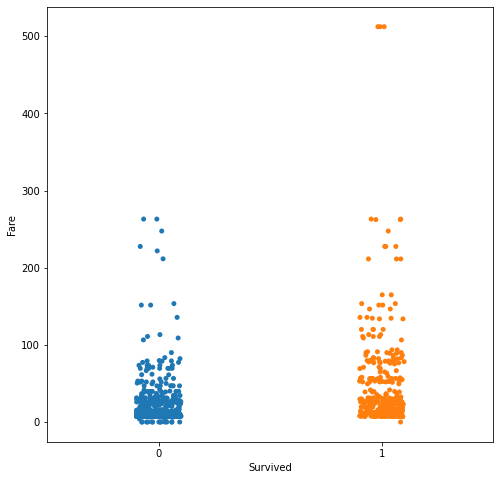

In [6]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Survived", y="Fare", data=train_df)
plt.show

<AxesSubplot:xlabel='Embarked'>

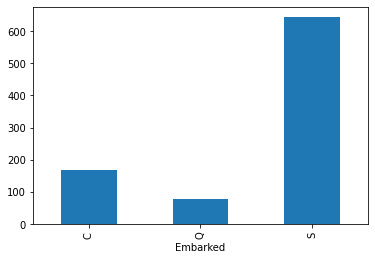

In [7]:
train_df.groupby("Embarked").Survived.count().plot.bar()

<AxesSubplot:xlabel='Survived'>

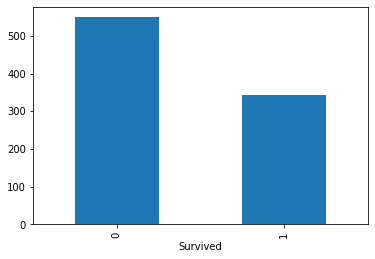

In [8]:
train_df.groupby('Survived').Pclass.count().plot.bar()

<AxesSubplot:xlabel='SibSp'>

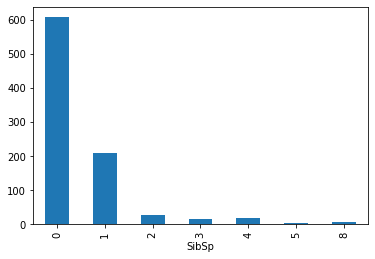

In [9]:
train_df.groupby('SibSp').Survived.count().plot.bar()

In [10]:
df2 = train_df.drop(['Name','Ticket','Cabin'], axis=1)

df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [11]:
df2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
df2.Age.fillna(df2.Age.mean(), inplace=True)
df2.Embarked.fillna("S", inplace=True)
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
y = df2.Survived
X  = df2.drop('Survived', axis=1)

for col in X.columns:
    if X[col].dtype == 'object':
        X[col],_= X[col].factorize()
        
        
mi_score = mutual_info_classif(X,y, random_state=1)

miscore = pd.Series(mi_score*100 , name="MI_score" , index=X.columns)

print(miscore) 

Pclass       6.325587
Sex         14.643567
Age          4.621755
SibSp        3.272418
Parch        3.689720
Fare        14.122135
Embarked     0.746520
Name: MI_score, dtype: float64


# Model training

In [14]:
# splitting dataset into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.80, test_size=0.20,random_state=0)

# model object
model = RandomForestClassifier(n_estimators=500, random_state=0)

# fitting model to data
model.fit(X_train,y_train)

# predicting values

preds = model.predict(X_valid)

# accuracy and confusion matrix

acc = accuracy_score(y_valid,preds)

print("accuracy score for classification: ",acc)

conf = confusion_matrix(y_valid,preds)

print(conf)

# precision score

score = precision_score(y_valid,preds)

print(score)

# roc and auc score

rocauc = roc_auc_score(y_valid,preds)

print("ROC and AUC score: ", rocauc)

# roc curve

curve = roc_curve(y_valid,preds)
print(curve)

accuracy score for classification:  0.8379888268156425
[[100  10]
 [ 19  50]]
0.8333333333333334
ROC and AUC score:  0.8168642951251647
(array([0.        , 0.09090909, 1.        ]), array([0.        , 0.72463768, 1.        ]), array([2, 1, 0]))


In [15]:
# prediction on test data

test_df = pd.read_csv('/kaggle/input/titanic/test.csv', index_col = 'PassengerId')

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


# Prediciton on test data

In [16]:
testdf2 = test_df.drop(['Name','Ticket','Cabin'], axis=1)

testdf2.isnull().sum()

testdf2.Age.fillna(testdf2.Age.mean(), inplace=True)
testdf2.Fare.fillna(testdf2.Fare.mean(), inplace=True)

# factorize object columns

for col in testdf2.columns:
    if testdf2[col].dtype == 'object':
        testdf2[col],_= testdf2[col].factorize()

# prediction on survival

prediction = model.predict(testdf2)

# submission csv

mysub = pd.DataFrame({'PassengerId':testdf2.index,
                       'Survived': prediction})

mysub.to_csv('mysubmission.csv', index=False)

# Gradient Boosting classifier model training

In [17]:
clf = GradientBoostingClassifier(n_estimators=500,
                                 learning_rate=0.01, 
                                 max_leaf_nodes=150,
                                 random_state=1,
                                 max_depth=4)


clf.fit(X_train,y_train)

prediction = clf.predict(X_valid)

# accuracy score

accu = accuracy_score(y_valid, prediction)

print("accuracy score of GBC:", accu)

# confusion metrix

con = confusion_matrix(y_valid,prediction)

print(con)

accuracy score of GBC: 0.8435754189944135
[[104   6]
 [ 22  47]]


# Prediction on testing data

In [18]:
test_pred = clf.predict(testdf2)

sub = pd.DataFrame({'PassengerId':testdf2.index,
                    'Survived':test_pred})

sub.to_csv('submission.csv', index=False)

# Kmeans clustring

In [19]:
# kmeans clustering 

y = df2.Survived
X2  = X.copy()

X2['Age'] = X2['Age'].map(lambda x: (x - X2['Age'].mean())/X2['Age'].std())
X2['Fare'] = X2['Fare'].map(lambda x: (x - X2['Fare'].mean())/X2['Fare'].std())

kmeans = KMeans(n_clusters=2, n_init=10, max_iter=10, random_state=0)

X2['Cluster'] = kmeans.fit_predict(X2)
X2['Cluster'] = X2['Cluster'].astype('category')

X2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cluster
PassengerId,,,,,,,,
1,3,0,-0.592148,1,0,-0.502163,0,1
2,1,1,0.638430,1,0,0.786404,1,1
3,3,1,-0.284503,0,0,-0.488580,0,1
4,1,1,0.407697,1,0,0.420494,0,1
5,3,0,0.407697,0,0,-0.486064,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

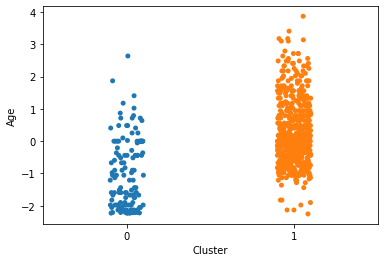

In [20]:
sns.stripplot(x='Cluster', y='Age', data = X2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

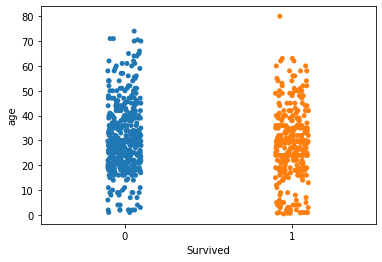

In [21]:
df = pd.DataFrame({'age': np.array(X['Age']),
                   'Cluster': np.array(X2['Cluster']),
                    'Survived': y})

sns.stripplot(x='Survived', y='age', data=df)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

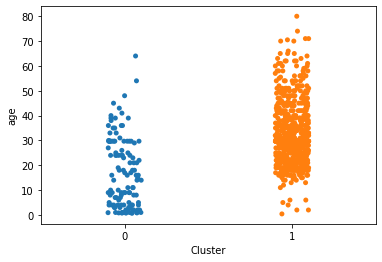

In [22]:
sns.stripplot(x='Cluster', y='age', data=df)

plt.show

# Feature engineering and improving accuracy of model

> From above models we can see there's issue of overfiiting, because of that we are not getting desired accuracy of from test data

> Below code tries to solve that problem so we can improve accuracy and avoid overfitting

In [23]:
# load the dataset again

data = pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# Name and Ticket columns are instances/individual itself so we can remove from dataframe

data2 = data.drop(['Name','Ticket'], axis=1)

# EDA on numerical variables and it's releations with our target

num_col = [col for col in data2.columns if data2[col].dtype in ['int64','float64']]

d3 = data2[num_col]

# average of each variable who survived or not

d3.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


> We can see that travellers from uppper class are more likely to survive

> Younger ones are more likely to survive than older age but there are some missing values to consider

> Subsequently we can see that upper class travellers as they are had to pay more to get onboard are more likely to survive

> Above all features can explain our target in some way so we will keep all features

In [25]:
# given the age is availabel or not we have imporance of age feature 

d3.groupby(d3['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [26]:
d3['Age'].fillna(d3['Age'].mean(), inplace=True)

d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 48.7 KB


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [27]:
# eda on categorical features

cat_features = ['Survived','Pclass','SibSp','Parch','Sex','Cabin','Embarked']

data2['Age'].fillna(data2['Age'].mean(), inplace=True)

data2[cat_features]

data2.info()
# we are having two variable with missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


<Figure size 432x432 with 0 Axes>

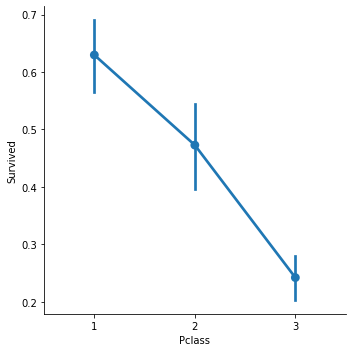

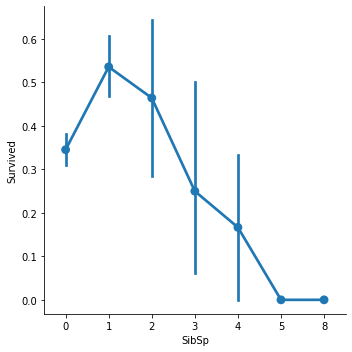

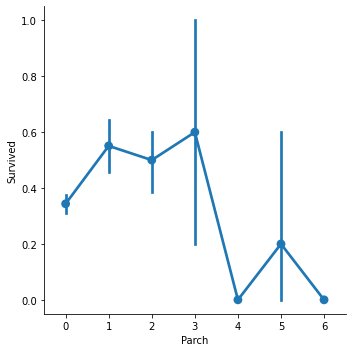

In [28]:
for idx, col in enumerate(['Pclass','SibSp','Parch']):
    plt.figure(idx, figsize=(6,6))
    sns.catplot(x=col, y='Survived', data=data2, kind='point')

> from above plots we can say that when siblings/family members increases survival ratio decreases

In [29]:
data2.pivot_table('Survived', index='Embarked', columns='Pclass')

# since embarkation is not related to survival of passanger as we can see in below table
#  survival rations are depend on class of ticket

Pclass,1,2,3
Embarked,,,
C,0.694118,0.529412,0.378788
Q,0.500000,0.666667,0.375000
S,0.582677,0.463415,0.189802


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x432 with 0 Axes>

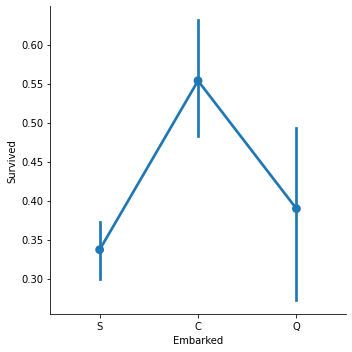

In [30]:
plt.figure(figsize=(6,6))
sns.catplot(x='Embarked', y='Survived', data=data2, kind='point')
plt.show

In [31]:
# relations between having cabin or not

# data2.groupby(data2['Cabin'].isnull()).mean()

# where cabin is not available, there we have less survival ratio and this validate by average fair 
#  of the ticket as well

data2['Cabin_cnt'] = np.where(data2['Cabin'].isnull(), 0,1)

In [32]:
for col in data2.columns:
    if data2[col].isnull().sum() == True:
        data2.drop(col, axis=1) 

In [33]:
sex_arr = np.array(train_df['Sex'].map({'male':0, 'female':1}))

In [34]:
data2['Sex'] = data2['Sex'].fillna(pd.Series(sex_arr), inplace=True)

data3 = data2.drop('Sex', axis=1)
data3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_cnt
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,NaN,S,0
2,1,1,38.0,1,0,71.2833,C85,C,1
3,1,3,26.0,0,0,7.9250,NaN,S,0
4,1,1,35.0,1,0,53.1000,C123,S,1
5,0,3,35.0,0,0,8.0500,NaN,S,0


In [35]:
data3['Sex_'] = sex_arr

In [36]:
data3.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_cnt,Sex_
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,NaN,S,0,0
2,1,1,38.0,1,0,71.2833,C85,C,1,1
3,1,3,26.0,0,0,7.9250,NaN,S,0,1
4,1,1,35.0,1,0,53.1000,C123,S,1,1
5,0,3,35.0,0,0,8.0500,NaN,S,0,0


In [37]:
data3.drop(['Cabin','Embarked'], axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_cnt,Sex_
PassengerId,,,,,,,,
1,0,3,22.000000,1,0,7.2500,0,0
2,1,1,38.000000,1,0,71.2833,1,1
3,1,3,26.000000,0,0,7.9250,0,1
4,1,1,35.000000,1,0,53.1000,1,1
5,0,3,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,0,0
888,1,1,19.000000,0,0,30.0000,1,1
889,0,3,29.699118,1,2,23.4500,0,1


# Traning model via gradient boosting

In [38]:
X = data3[['Pclass','Age','SibSp','Parch','Fare','Sex_','Cabin_cnt']]
y = train_df['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8, test_size=0.2,
                                                       random_state=0)

mymodel = GradientBoostingClassifier(n_estimators=2000,
                                 learning_rate=0.01, 
                                 max_leaf_nodes=500,
                                 random_state=0,
                                 max_depth=2)


# fitting model to data

mymodel.fit(X_train,y_train)

# prediction values

predictions = mymodel.predict(X_valid)

# accuracy score

score = accuracy_score(y_valid,predictions)

print("Accuracy score of the model: ", score)

# confusion matrix

confusion = confusion_matrix(y_valid,predictions)

print(confusion)

Accuracy score of the model:  0.8212290502793296
[[102   8]
 [ 24  45]]
